In [1]:
%matplotlib inline

#%matplotlib 
#import matplotlib.pyplot as plt
#plt.ion()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

In [4]:
cwd = os.getcwd()
NOTEBOOK_DIR = os.path.dirname(cwd+'/')
ROOT = os.path.dirname(NOTEBOOK_DIR)

import sys
sys.path.append(ROOT)

In [5]:
from utils.plot import *
from utils.tools import *
from utils.nn import TARGET_FUNCS_DICT, LOSS_DICT
from networks import two_layer_net

In [6]:
FIGURES_DIR = os.path.join(ROOT, 'figures/2-layer/neurons_dynamic')

## Constants

In [94]:
n_samples = 500
input_dim = 2
width = 1024
bias = False
n_steps = 5000
base_lr = 1e-2
batch_size = None
tgt_func_name = "target_func"
activation="relu"

SEED = 42
pause = 1e-6

In [95]:
set_random_seeds(SEED)

## Set up data, model, loss and optimizer

In [96]:
def target_func_2d(X):
    return 0.5 * X[:, 0] ** 2

In [97]:
def target_func_3d(X):
    return 0.5 * (X[:, :2] ** 2).sum()

In [98]:
def target_func_gen(X, d_H):
    return (1 / (2*d_H)) * (X[:, :d_H] ** 2).sum()

In [99]:
# val data
X_val = torch.randn(size=(n_samples, input_dim), requires_grad=False)
target_func = TARGET_FUNCS_DICT['{}_{}d'.format(tgt_func_name, input_dim)]
y_val = torch.reshape(target_func_2d(X_val), (len(X_val), 1))

# network
network = two_layer_net.TwoLayerNet(input_dim=input_dim, width=width, activation=activation, bias=bias)
network.train()

# loss & optimizer
loss = LOSS_DICT['mse'](reduction='mean')
optimizer = torch.optim.SGD(network.parameters(), lr=width * base_lr)
optimizer2 = torch.optim.SGD(net2.parameters(), lr=base_lr)

## Plot initial neurons

In [100]:
signs = network.output_layer.weight.data.detach().clone().numpy()[0]
init_neurons = network.input_layer.weight.data.detach().clone().numpy()

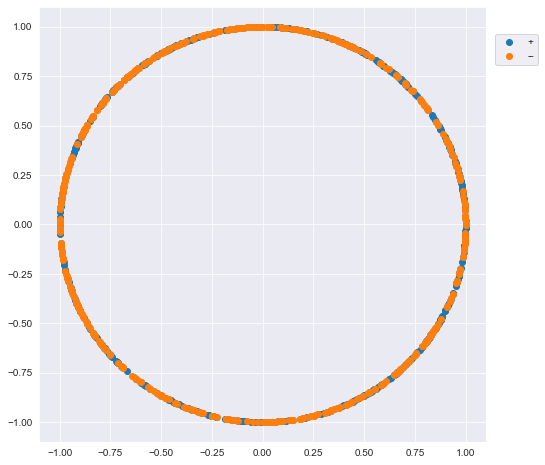

In [101]:
fig = plt.figure(figsize=(8,8))
plot_neurons_2d(fig, init_neurons, signs)
plt.show()

## Train for a few steps

In [102]:
bs = 256
neurons = [network.input_layer.weight.data.detach().clone().numpy()]
train_losses = []
val_losses = []
for i in range(n_steps):
    X = torch.randn(size=(bs, input_dim), requires_grad=False)
    y = torch.reshape(target_func_2d(X), (len(X), 1))

    # forward
    optimizer.zero_grad()
    y_hat = network.forward(X)
    loss_ = loss(y_hat, y)
    # loss_ = 0.5 * ((y_hat - y) ** 2).mean()

    # backward and gradient step
    loss_.backward()
    optimizer.step()
    train_losses.append(loss_.detach().item())
    
    # val
    with torch.no_grad():
        y_hat_val = network.forward(X_val)
        val_loss = loss(y_hat_val, y_val)
        # val_loss = 0.5 * ((y_hat_val - y_val) ** 2).mean()
        val_losses.append(val_loss.detach().item())
    
    neurons.append(network.input_layer.weight.data.detach().clone().numpy())

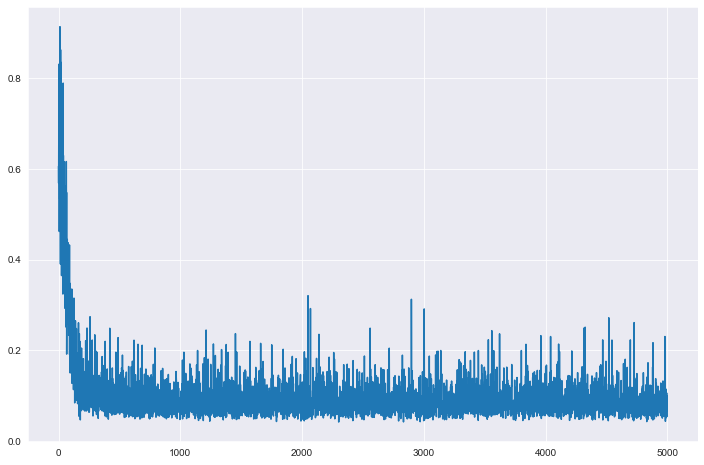

In [103]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(train_losses)), train_losses)
plt.show()

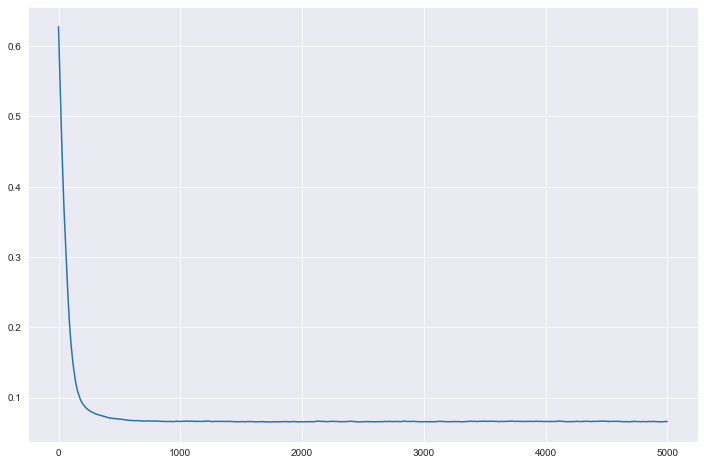

In [104]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(val_losses)), val_losses)
plt.show()

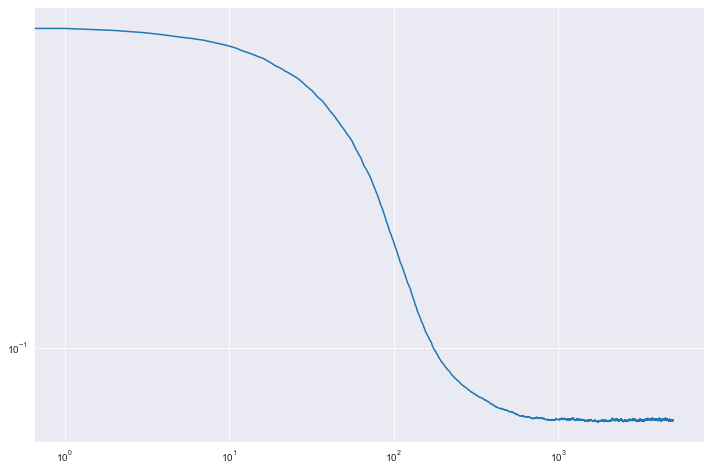

In [156]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(val_losses)), val_losses)
plt.xscale('log')
plt.yscale('log')
plt.show()

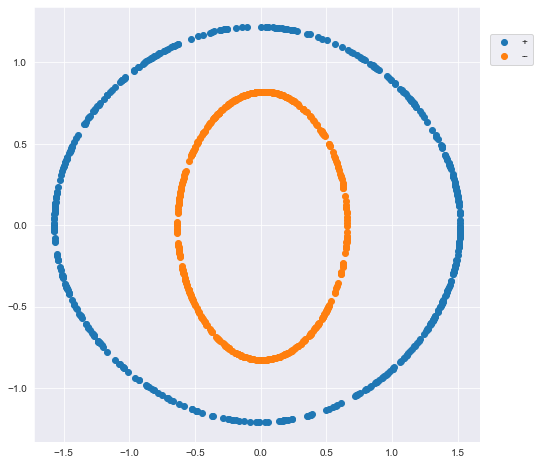

In [128]:
fig = plt.figure(figsize=(8,8))
plot_neurons_2d(fig, neurons[70], signs)
plt.show()

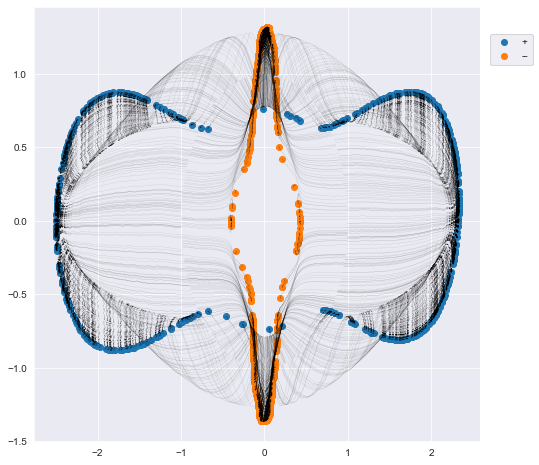

In [106]:
fig = plt.figure(figsize=(8,8))
plot_neurons_trajectory_2d(fig, neurons, signs)
plt.show()

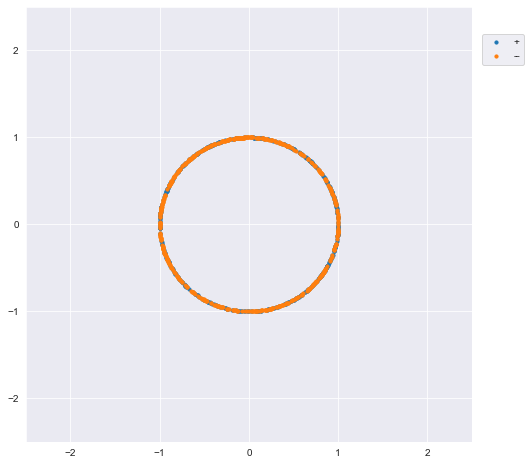

In [145]:
lim = 2.5
fig = plt.figure(figsize=(8,8))
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plot_neurons_2d(fig, neurons[0], signs, s=10)
plt.show()

In [137]:
lim = 2.5
fig = plt.figure(figsize=(8,8))
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plot_neurons_2d(fig, neurons[0], signs)
fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(0))
plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
plt.close()

In [147]:
neurons[0]

array([[ 0.4269265 ,  0.9042863 ],
       [ 0.15129489,  0.9884887 ],
       [-0.5803689 ,  0.81435376],
       ...,
       [ 0.5763008 ,  0.8172377 ],
       [-0.71616447,  0.6979316 ],
       [ 0.6698623 , -0.7424854 ]], dtype=float32)

In [152]:
xs = []
ys = []

for j in range(width):
    xs_j = []
    ys_j = []
    for neurons_t in neurons:
        xs_j.append(neurons_t[j, 0])
        ys_j.append(neurons_t[j, 1])
        
    xs.append(xs_j)
    ys.append(ys_j)
    
xs = np.array(xs)
ys = np.array(ys)

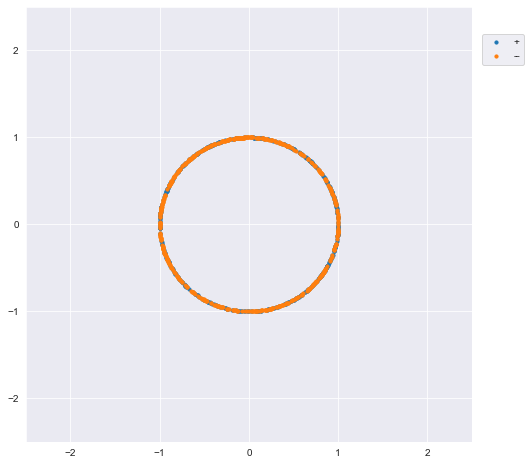

In [155]:
lim = 2.5
fig = plt.figure(figsize=(8,8))
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plot_neurons_2d(fig, neurons[0], signs)

In [154]:
lim = 2.5
fig = plt.figure(figsize=(8,8))
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plot_neurons_2d(fig, neurons[0], signs)
fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(0))
plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
plt.close()

n_max = 2000
for i in range(n_max // 5):
    if i % 10 == 0:
        print(i)
    fig = plt.figure(figsize=(8,8))
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plot_neurons_trajectory_2d(fig, xs[:, :(i+1) * 5], ys[:, :(i+1) * 5],  neurons[(i+1) * 5], signs)
    #if (i +1) * 5 - 10 > 0:
    #    plot_neurons_trajectory_2d(fig, neurons[(i +1) * 5 - 10:(i+1) * 5], signs)
        #plot_neurons_2d(fig, neurons[(i+1) * 5], signs)
    #else:
    #    plot_neurons_trajectory_2d(fig, neurons[:(i+1) * 5], signs)
        #plot_neurons_2d(fig, neurons[(i+1) * 5], signs)
    fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(i))
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    plt.close()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


In [167]:
a = network.output_layer.weight.data.detach().numpy()

In [169]:
a.shape

(1, 1024)

In [174]:
-(a[a<0]).sum()

537.75146

In [175]:
a[a>0].sum()

1010.81714

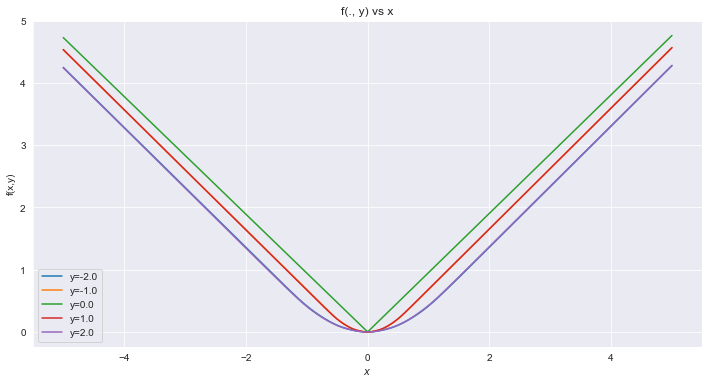

In [163]:
ys = [-2.0, -1., 0., 1.0, 2.0]
start = -5.0
stop = 5.0
num = 500

xs = np.linspace(start=start, stop=stop, endpoint=True, num=num)

with torch.no_grad():
    zs = [[network.forward(torch.tensor([[x, y]]).float()).data.detach().item() for x in xs] for y in ys]

figsize = (12, 6)
plt.figure(figsize=figsize)
for i, y in enumerate(ys):
    plt.plot(xs, zs[i], label='y={}'.format(y))

plt.title('f(., y) vs x')
plt.xlabel('$x$')
plt.ylabel('f(x,y)')
plt.legend()
plt.show()

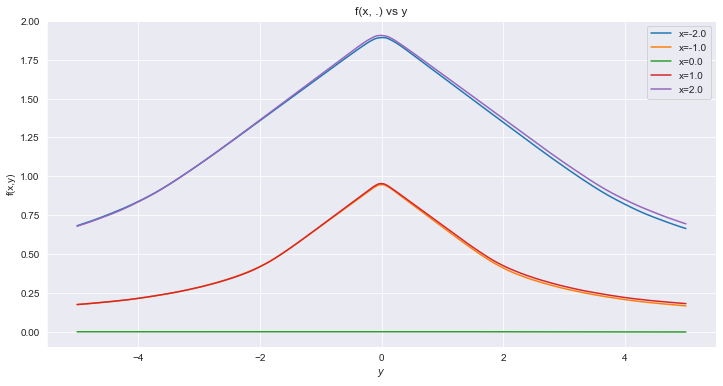

In [165]:
xs = [-2.0, -1., 0., 1.0, 2.0]
start = -5.0
stop = 5.0
num = 500

ys = np.linspace(start=start, stop=stop, endpoint=True, num=num)

with torch.no_grad():
    zs = [[network.forward(torch.tensor([[x, y]]).float()).data.detach().item() for y in ys] for x in xs]

figsize = (12, 6)
plt.figure(figsize=figsize)
for i, x in enumerate(xs):
    plt.plot(ys, zs[i], label='x={}'.format(x))

plt.title('f(x, .) vs y')
plt.xlabel('$y$')
plt.ylabel('f(x,y)')
plt.legend()
plt.show()

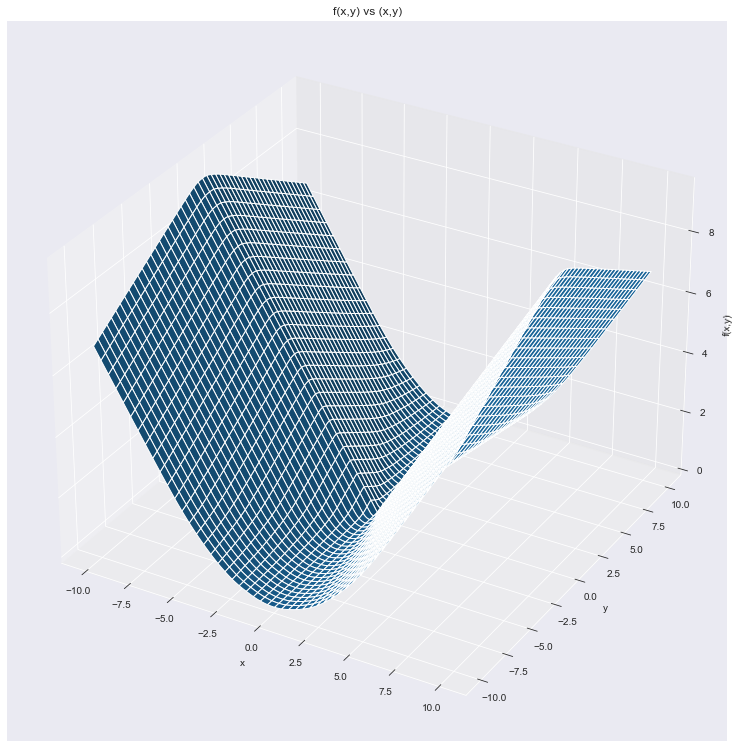

In [160]:
alphas = [0.5, 1.0, 2.0, 5.0]

start = -10.0
stop = 10.0

num = 300

xs = np.linspace(start=start, stop=stop, endpoint=True, num=num)
ys = np.linspace(start=start, stop=stop, endpoint=True, num=num)

with torch.no_grad():
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            u = torch.tensor([[X[i,j], Y[i,j]]]).float()
            Z[i,j] = network.forward(u).data.detach().item()

figsize = (10, 10)
fig = plt.figure(figsize=figsize)
ax = Axes3D(fig, auto_add_to_figure=False)
ax.plot_surface(X, Y, Z)
fig.add_axes(ax)

plt.title('f(x,y) vs (x,y)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

In [17]:
if batch_size is None:
    batch_size = n_samples

In [12]:
# figsize = (8, 8)
    # fig = plt.figure(figsize=figsize)
    # 
    # cmpt_steps = 0
    # batch_index = 0
    # while cmpt_steps < 40:
    #     with torch.no_grad():
    #         plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #         fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #         plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #         fig.canvas.draw()
    #         # plt.pause(pause)
    #         fig.canvas.flush_events()
    # 
    #     if batch_index >= n_samples:
    #         batch_index = 0
    #     # batch inputs and targets
    #     batch_x = X[batch_index: batch_index + batch_size, :]
    #     batch_y = y[batch_index: batch_index + batch_size]
    #     batch_index += batch_index + batch_size
    # 
    #     # forward
    #     y_hat = network.forward(batch_x)
    #     loss_ = loss(y_hat, batch_y)
    # 
    #     # backward and gradient step
    #     print(loss_.detach().item())
    #     loss_.backward()
    #     optimizer.step()
    # 
    #     cmpt_steps += 1
    # 
    # with torch.no_grad():
    #     plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #     fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #     plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #     fig.canvas.draw()
    #     # plt.pause(pause)
    #     fig.canvas.flush_events()

## Plot loss

In [18]:
losses = []
neurons = [network.input_layer.weight.data.detach().clone().numpy()]
# fig = plt.figure(figsize=(8,8))

cmpt_steps = 0
batch_index = 0
while cmpt_steps < 500:
    #plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
    #plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    
    if batch_index >= n_samples:
        batch_index = 0
    # batch inputs and targets
    batch_x = X[batch_index: batch_index + batch_size, :]
    batch_y = y[batch_index: batch_index + batch_size]
    batch_index += batch_index + batch_size

    # forward
    y_hat = network.forward(batch_x)
    loss_ = loss(y_hat, batch_y)

    # backward and gradient step
    # print(loss_.detach().item())
    losses.append(loss_.detach().item())
    loss_.backward()
    optimizer.step()
    
    neurons.append(network.input_layer.weight.data.detach().clone().numpy())

    cmpt_steps += 1
    
#plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
#fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
#plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)

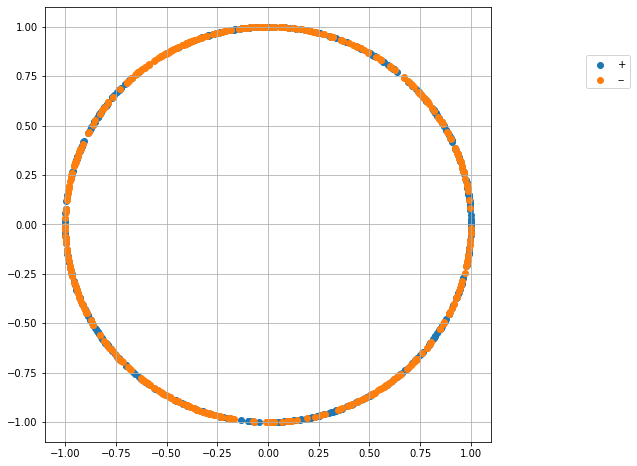

In [20]:
fig = plt.figure(figsize=(8,8))
plot_neurons_2d(fig, neurons[0], signs)
plt.show()

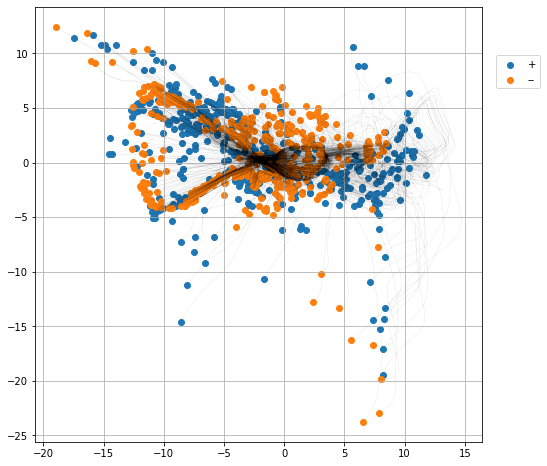

In [23]:
fig = plt.figure(figsize=(8,8))
plot_neurons_trajectory_2d(fig, neurons, signs)
plt.show()

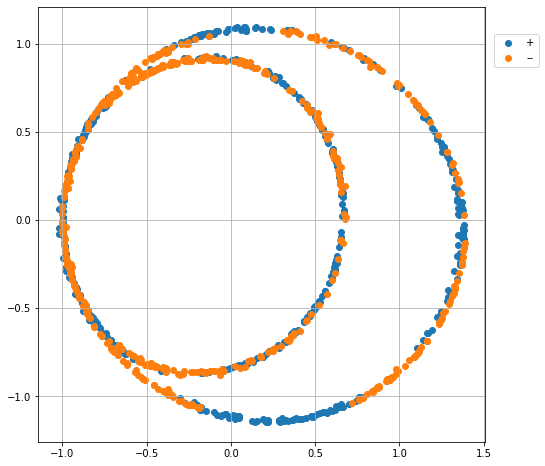

In [40]:
fig = plt.figure(figsize=(8,8))
plot_neurons_2d(fig, neurons[18], signs)
plt.show()

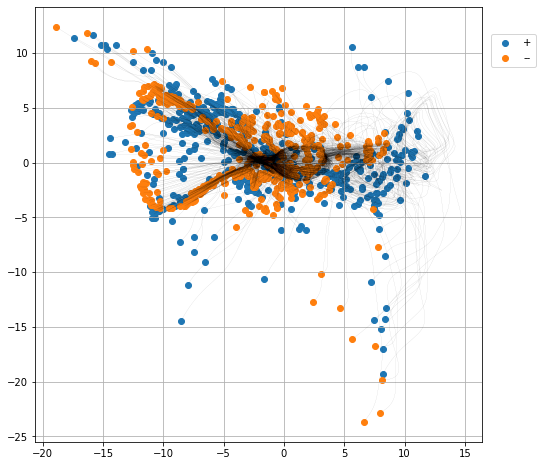

In [56]:
fig = plt.figure(figsize=(8,8))
plot_neurons_trajectory_2d(fig, neurons[:500], signs)
plt.show()

In [57]:
loss_

tensor(0.2279, grad_fn=<MseLossBackward0>)

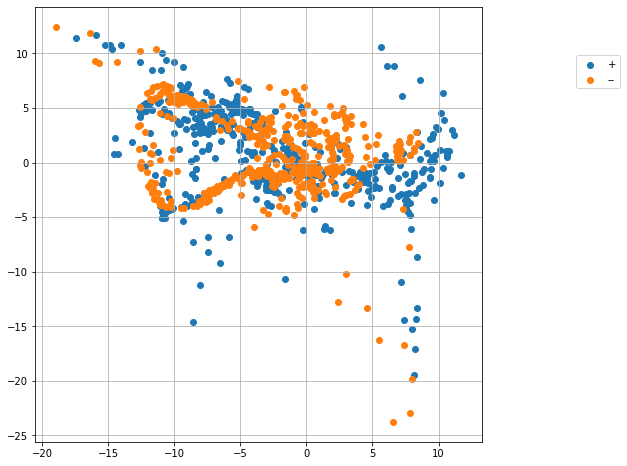

In [21]:
fig = plt.figure(figsize=(8,8))
plot_neurons_2d(fig, neurons[-1], signs)
plt.show()

0
1
2
3
4
5
6
7


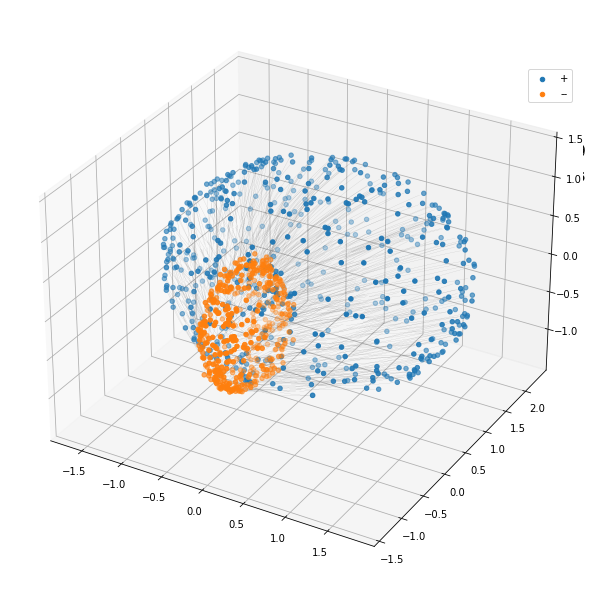

In [31]:
fig = plt.figure(figsize=(8,8))
plot_neurons_3d(fig, neurons=neurons[0], signs=signs)
fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(0))
plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
for i in range((len(neurons) // 5)):
    print(i)
    plot_neurons_trajectory_3d(fig, neurons=neurons[:5 * (i+1)], signs=signs)
    fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(5 * (i+1)))
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)

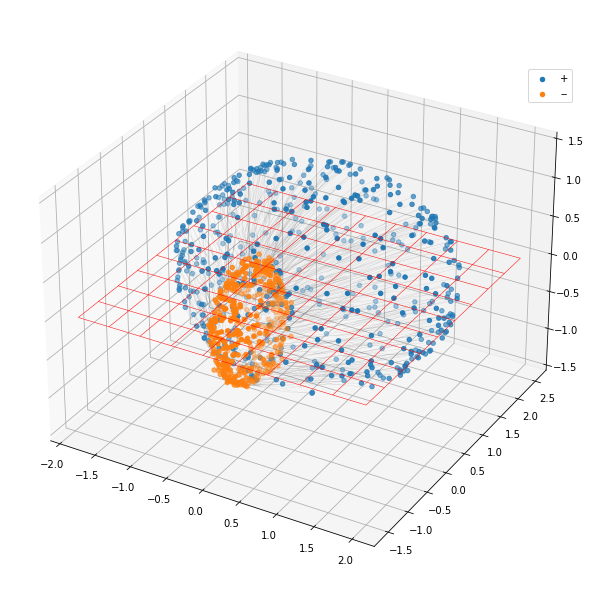

In [93]:
fig = plt.figure(figsize=(8,8))
plot_neurons_trajectory_3d(fig, neurons=neurons, signs=signs, show_plane=True)
plt.show()

In [94]:
def fla(x):
    return x+1

[autoreload of utils.nn failed: Traceback (most recent call last):
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/karlhajjar/Documents/projects/learning-structure/env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.9/3.9.7_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.9/3.9.7_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_remove

ERROR! Session/line number was not unique in database. History logging moved to new session 1632


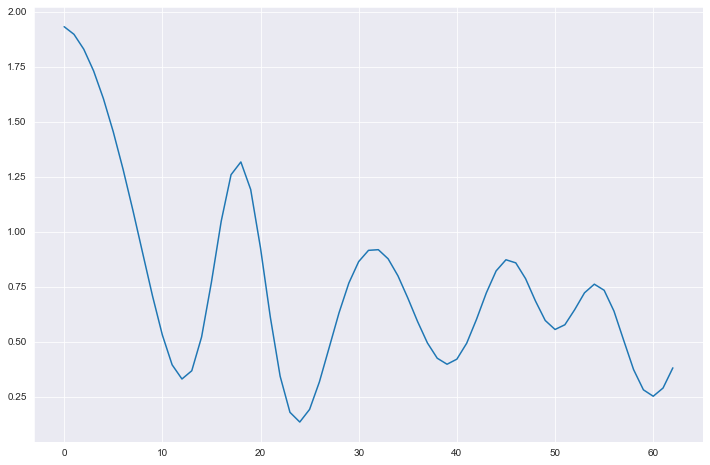

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(losses)), losses)

In [52]:
xs = np.linspace(start=[-4, -4], stop=[4,4], num=50, endpoint=True, axis=0)
xs

array([[-4.        , -4.        ],
       [-3.83673469, -3.83673469],
       [-3.67346939, -3.67346939],
       [-3.51020408, -3.51020408],
       [-3.34693878, -3.34693878],
       [-3.18367347, -3.18367347],
       [-3.02040816, -3.02040816],
       [-2.85714286, -2.85714286],
       [-2.69387755, -2.69387755],
       [-2.53061224, -2.53061224],
       [-2.36734694, -2.36734694],
       [-2.20408163, -2.20408163],
       [-2.04081633, -2.04081633],
       [-1.87755102, -1.87755102],
       [-1.71428571, -1.71428571],
       [-1.55102041, -1.55102041],
       [-1.3877551 , -1.3877551 ],
       [-1.2244898 , -1.2244898 ],
       [-1.06122449, -1.06122449],
       [-0.89795918, -0.89795918],
       [-0.73469388, -0.73469388],
       [-0.57142857, -0.57142857],
       [-0.40816327, -0.40816327],
       [-0.24489796, -0.24489796],
       [-0.08163265, -0.08163265],
       [ 0.08163265,  0.08163265],
       [ 0.24489796,  0.24489796],
       [ 0.40816327,  0.40816327],
       [ 0.57142857,

In [54]:
xs = np.mgrid[-4:4, -4:4]
xs

array([[[-4, -4, -4, -4, -4, -4, -4, -4],
        [-3, -3, -3, -3, -3, -3, -3, -3],
        [-2, -2, -2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3]],

       [[-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3],
        [-4, -3, -2, -1,  0,  1,  2,  3]]])

In [55]:
xs.shape

(2, 8, 8)

In [82]:
num = 5
xs = np.linspace(-4, 4, num=5, endpoint=True)
ys = np.linspace(-4, 4, num=5, endpoint=True)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

/var/folders/dk/nmyl016j3lj9xqhfs1wy5fgr0000gn/T/ipykernel_57627/3439503141.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, auto_add_to_figure=True)


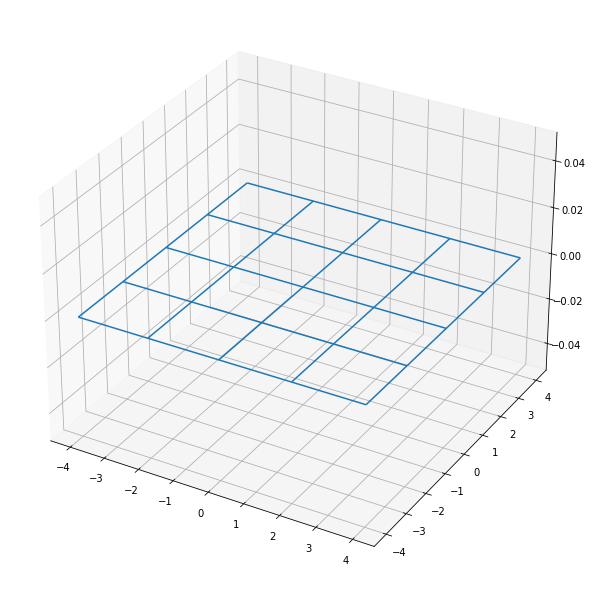

In [83]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=True)
ax.plot_wireframe(X, Y, Z)
plt.show()

In [48]:
from mpl_toolkits.mplot3d import axes3d

In [68]:
X, Y, Z = axes3d.get_test_data(0.05)

In [69]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ...,
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

In [70]:
Y

array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
       ...,
       [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
       [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
       [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]])

In [71]:
Z

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

In [97]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [101]:
fig.scatter([1,2,3], [1,2,3])
plt.show()

AttributeError: 'Figure' object has no attribute 'scatter'

In [ ]:
fig.c

In [98]:
ax = fig.axes

In [99]:
ax.scatter([1,2,3], [1,2,3])
plt.show()

AttributeError: 'list' object has no attribute 'scatter'

In [ ]:
fig.